In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

1. Загрузите данные по вариантам в ноутбук.


In [2]:
# Загружаем вариант, заголовками берем третью строку, первый столбец берем как индексы
table = pd.read_excel("Вариант 1.xlsx", header=2, index_col=0)
# Удаляем строку содержащую итоговые данные
table = table.drop(table.index[-1])
table


,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,
1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0
2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0
3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9.0,22.0,24.0
4.0,152.0,13,М,104.0,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9.0,22.0,24.0
5.0,132.0,11,М,337.0,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10.0,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...
3044.0,146.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0
3045.0,147.0,11,Ж,340.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0
3046.0,147.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0


2. Сделайте описательную статистику полученных данных.


In [3]:
table.describe()


,№ школы,Номер варианта,Первичный балл,Балл,Минимальный балл
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.0
mean,138.753281,340.787730,43.573491,72.769029,24.0
std,41.793413,39.077186,8.931816,13.664908,0.0
min,104.000000,101.000000,8.000000,20.000000,24.0
25%,126.000000,339.000000,38.000000,64.000000,24.0
50%,144.000000,342.000000,45.000000,72.000000,24.0
75%,148.000000,346.000000,50.000000,82.000000,24.0
max,1106.000000,706.000000,58.000000,100.000000,24.0


3. Найдите процент учащихся, выполнивших работу ниже среднего.


In [4]:
# Для каждой строки указываем меньше ли балл чем средний, считаем количество True через сумму
le = (table["Балл"] < table["Балл"].mean()).sum()

# Переводим в проценты
f"{le / len(table):.3%}"

'51.280%'

4. Найти процент учащихся не сдавших экзамен.


In [5]:
# Находим стрки где балл меньше минимального
lose = (table["Балл"] < table["Минимальный балл"]).sum()

f"{lose / len(table):.3%}"

'0.131%'

5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.


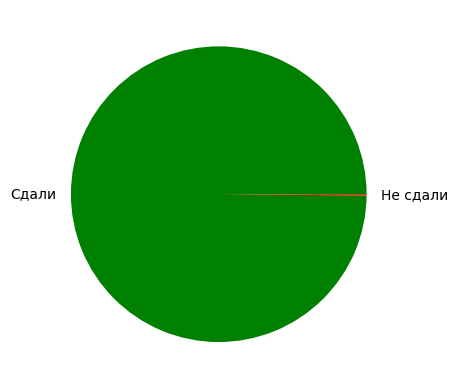

In [6]:
# Считаем количество не сдавших
failed = (table["Балл"] < table["Минимальный балл"]).sum()
# Считаем количество сдавших
passed = len(table) - failed
plt.pie(
    [passed, failed],
    labels=["Сдали", "Не сдали"],
    colors=["g", "r"],
)
None

6. Постройте ядерную оценку плотности распределению баллов за экзамен.


<Axes: ylabel='Density'>

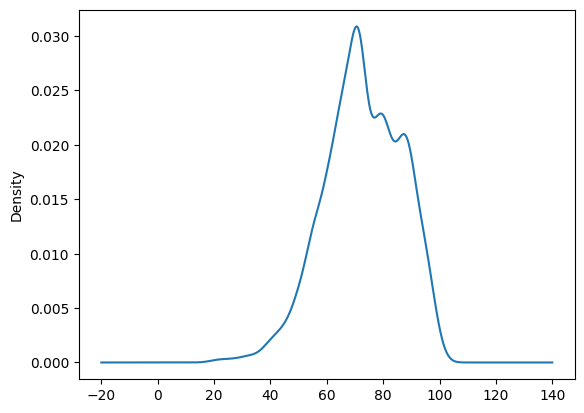

In [7]:
table["Балл"].plot.kde()

7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».


In [8]:
great = (table["Балл"] > 75).sum()
well = (table["Балл"] > 50).sum() - great
sat = (table["Балл"] > 25).sum() - great - well
unsat = len(table) - great - well - sat
good = np.array([great, well, sat, unsat]) / len(table)
print(
    "Отлично: {:.3%}\nХорошо: {:.3%}\nУдовлетворительно: {:.3%}\nНеудовлетворительно: {:.3%}\n".format(
        *good
    )
)

Отлично: 44.127%
Хорошо: 50.230%
Удовлетворительно: 5.446%
Неудовлетворительно: 0.197%



8. Какое процентное соотношение юношей и девушек писало данный экзамен?


In [9]:
male = (table["Пол"] == "М").sum()
female = (table["Пол"] == "Ж").sum()
print(f"Юноши: {male/len(table):.3%}\nДевушки: {female/len(table):.3%}")

Юноши: 42.028%
Девушки: 57.972%


9. Сколько школ принимало участие в экзамене?


In [10]:
# Берем уникальные значения из столбца с номрами школ и считаем их кол-во
len(table["№ школы"].unique())

24

10. Сколько всего заданий с кратким ответом? С развернутым ответом?


In [11]:
# short_ans_count = len(table['Задания с кратким ответом'].iloc[0])
long_ans = len(table['Задания с развёрнутым ответом'].iloc[0])//4
short_ans = len(table['Задания с кратким ответом'].iloc[0])
print(f"Задания с длинным ответом {long_ans}\nЗадания с коротким ответом {short_ans}")

Задания с длинным ответом 12
Задания с коротким ответом 25


11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: $В_1$, ... $В_к$ Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.


In [12]:
typeB = pd.DataFrame([*table['Задания с кратким ответом'].map(list).values])
typeB

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,+,+,+,-,-,1,+,-,+,...,-,-,-,-,-,-,-,-,-,0
1,1,+,-,-,-,+,0,-,-,+,...,-,-,-,-,+,+,-,+,-,0
2,2,-,-,-,-,-,0,-,-,+,...,-,-,-,-,-,-,-,-,-,1
3,1,+,-,-,+,-,0,+,+,-,...,-,-,-,-,+,+,-,-,-,0
4,1,+,+,-,-,-,0,-,+,+,...,-,-,-,-,+,-,-,-,-,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,2,+,+,+,+,+,5,+,+,+,...,+,+,+,+,+,+,+,+,+,4
3044,2,+,+,+,+,+,5,+,+,+,...,+,+,+,+,+,+,+,+,+,4
3045,2,+,+,+,+,+,5,+,+,+,...,+,+,+,+,+,+,+,+,+,4
3046,2,+,+,+,+,+,5,+,+,+,...,+,+,+,+,+,+,+,+,+,4


In [13]:
# Считаем процент выполненых (+ или 1)
(((typeB == "+") | (typeB == '1')).sum()/len(typeB)).map(lambda x: f"{x:.3%}")

0     16.995%
1     92.881%
2     87.336%
3     77.297%
4     58.957%
5     90.617%
6      7.054%
7     75.591%
8     84.121%
9     96.883%
10    93.176%
11    75.525%
12    83.136%
13    70.177%
14    21.194%
15    68.963%
16    67.224%
17    74.180%
18    69.357%
19    82.743%
20    71.850%
21    48.064%
22    76.542%
23    24.770%
24     3.773%
dtype: object

12. Аналогично и с типом С (ответы с развернутым ответом)


In [14]:
# Берем все задания с развернутым ответом, и приводим к новому датафрейму
# Новый датасет содержит данные на сколько выполнено задание

def parse_C(value):
    a = np.array(list(map(int, value[::4])))
    t = np.array(list(map(int, value[2::4])))
    return a / t
typeC = pd.DataFrame([*table['Задания с развёрнутым ответом'].map(parse_C).values])
typeC

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.5,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3043,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0
3044,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0
3045,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0
3046,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0


In [15]:
# Вычисляем процентное соотношение и выводим в соответствующем виде
((typeC == 1).sum()/len(typeC)).map(lambda x: f"{x:.3%}")

0     96.752%
1     47.507%
2     94.455%
3     61.352%
4     67.290%
5     25.689%
6     41.339%
7     22.900%
8     32.054%
9     22.277%
10    97.999%
11    84.547%
dtype: object

13. Сделайте анализ по двум школам:
    1. по всем выполненным заданиям типа В
    2. по заданиям типа С больше 50%
    3. по среднему баллу юношей и девушек


In [16]:
school1 = table[table['№ школы'] == table['№ школы'].unique()[0]]
school2 = table[table['№ школы'] == table['№ школы'].unique()[1]]

In [17]:
def mean_score(df):
    # Средний балл юношей и девушек
    male = df[df['Пол'] == 'М']['Балл'].mean()
    female = df[df['Пол'] == 'Ж']['Балл'].mean()
    return male, female

## Школа 1

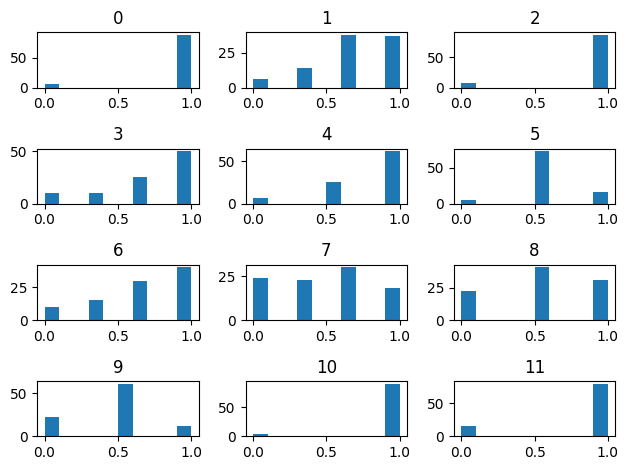

In [18]:
# Смотрим для школы гистограмму решенных C
typeC[(table['№ школы'] == table['№ школы'].unique()[0]).values].hist(grid=False)
plt.tight_layout()

<Axes: >

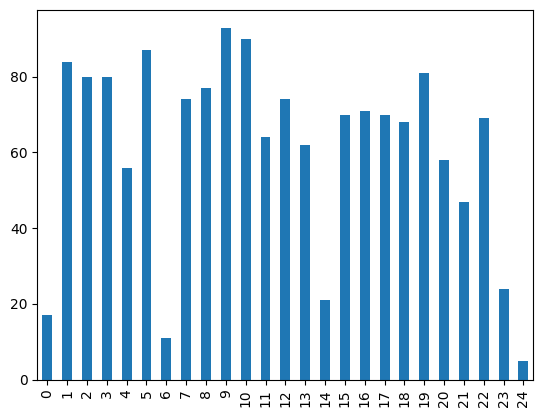

In [19]:
# Количество выполненых заданий B
data = typeB[(table['№ школы'] == table['№ школы'].unique()[0]).values]
((data == '+') | (data == '1')).sum().plot.bar()

In [20]:
# Средний балл среди юношей и девушек
print("Средний балл\nЮношей: {:.3f}\nДевушек: {:.3f}".format(*mean_score(school1)))

Средний балл
Юношей: 65.023
Девушек: 75.686


## Школа 1

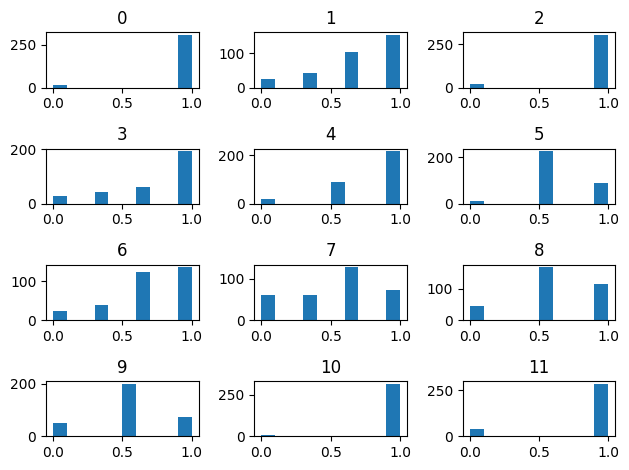

In [21]:
# Смотрим для школы гистограмму решенных C
typeC[(table['№ школы'] == table['№ школы'].unique()[1]).values].hist(grid=False)
plt.tight_layout()

<Axes: >

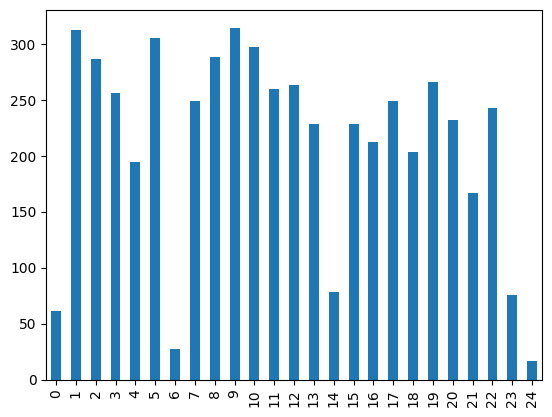

In [22]:
# Количество выполненых заданий B
data = typeB[(table['№ школы'] == table['№ школы'].unique()[1]).values]
((data == '+') | (data == '1')).sum().plot.bar()

In [23]:
# Средний балл среди юношей и девушек
print("Средний балл\nЮношей: {:.3f}\nДевушек: {:.3f}".format(*mean_score(school2)))

Средний балл
Юношей: 68.167
Девушек: 75.746
